In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm


In [173]:
sales=pd.read_excel(r'/content/Fact_Sales.xlsx')
customers=pd.read_excel(r'/content/Dim_Customer.xlsx')
category=pd.read_excel(r"/content/Dim_Category.xlsx")
country=pd.read_excel(r"/content/Dim_Country1.xlsx")
date=pd.read_excel(r"/content/Dim_Date.xlsx")
location=pd.read_excel(r"/content/Dim_Location.xlsx")
product=pd.read_excel(r"/content/Dim_Product.xlsx")
subcategory=pd.read_excel(r"/content/Dim_SubCategory.xlsx")

In [174]:
sales.head(3)

,InvoiceNo,InvoiceDate,CustomerID,ProductID,Quantity,UnitPrice,TotalAmount
0,INV0000001,2024-10-29,C1702,P023,5,671.66,3358.30
1,INV0000002,2025-01-16,C0338,P040,3,621.13,1863.39
2,INV0000003,2025-05-15,C0462,P077,5,825.61,4128.05


In [175]:
sales.tail(3)

,InvoiceNo,InvoiceDate,CustomerID,ProductID,Quantity,UnitPrice,TotalAmount
49497,INV0049998,2025-07-12,C0988,P024,2,37.59,75.18
49498,INV0049999,2024-01-12,C0169,P044,5,29.11,145.55
49499,INV0050000,2023-10-20,C0837,P050,1,717.44,717.44


In [176]:
sales.sample(3)

,InvoiceNo,InvoiceDate,CustomerID,ProductID,Quantity,UnitPrice,TotalAmount
31962,INV0032288,2024-03-05,C0607,P077,1,825.61,825.61
5728,INV0005790,2024-11-05,C0057,P019,2,42.98,85.96
23605,INV0023840,2024-12-24,C1199,P047,1,1479.53,1479.53


In [177]:
sales.values

array([['INV0000001', Timestamp('2024-10-29 00:00:00'), 'C1702', ..., 5,
        671.66, 3358.3],
       ['INV0000002', Timestamp('2025-01-16 00:00:00'), 'C0338', ..., 3,
        621.13, 1863.39],
       ['INV0000003', Timestamp('2025-05-15 00:00:00'), 'C0462', ..., 5,
        825.61, 4128.05],
       ...,
       ['INV0049998', Timestamp('2025-07-12 00:00:00'), 'C0988', ..., 2,
        37.59, 75.18],
       ['INV0049999', Timestamp('2024-01-12 00:00:00'), 'C0169', ..., 5,
        29.11, 145.55],
       ['INV0050000', Timestamp('2023-10-20 00:00:00'), 'C0837', ..., 1,
        717.44, 717.44]], dtype=object)

In [178]:
sales.dtypes

,0
InvoiceNo,object
InvoiceDate,datetime64[ns]
CustomerID,object
ProductID,object
Quantity,int64
UnitPrice,float64
TotalAmount,float64


In [179]:
sales.describe()

,InvoiceDate,Quantity,UnitPrice,TotalAmount
count,49500,49500.000000,49500.000000,49500.000000
mean,2024-08-16 12:40:00,3.001434,609.569639,1829.864885
min,2023-08-18 00:00:00,1.000000,8.150000,8.150000
25%,2024-02-14 00:00:00,2.000000,54.830000,171.920000
50%,2024-08-17 00:00:00,3.000000,453.250000,1023.300000
75%,2025-02-16 00:00:00,4.000000,1008.240000,2670.460000
max,2025-08-17 00:00:00,5.000000,2331.730000,11658.650000
std,NaN,1.413591,599.886565,2171.056489


In [180]:
sales.describe(include='all')

,InvoiceNo,InvoiceDate,CustomerID,ProductID,Quantity,UnitPrice,TotalAmount
count,49500,49500,49500,49500,49500.000000,49500.000000,49500.000000
unique,49500,NaN,2000,80,NaN,NaN,NaN
top,INV0050000,NaN,C1596,P078,NaN,NaN,NaN
freq,1,NaN,42,674,NaN,NaN,NaN
mean,NaN,2024-08-16 12:40:00,NaN,NaN,3.001434,609.569639,1829.864885
min,NaN,2023-08-18 00:00:00,NaN,NaN,1.000000,8.150000,8.150000
25%,NaN,2024-02-14 00:00:00,NaN,NaN,2.000000,54.830000,171.920000
50%,NaN,2024-08-17 00:00:00,NaN,NaN,3.000000,453.250000,1023.300000
75%,NaN,2025-02-16 00:00:00,NaN,NaN,4.000000,1008.240000,2670.460000
max,NaN,2025-08-17 00:00:00,NaN,NaN,5.000000,2331.730000,11658.650000


In [181]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49500 entries, 0 to 49499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    49500 non-null  object        
 1   InvoiceDate  49500 non-null  datetime64[ns]
 2   CustomerID   49500 non-null  object        
 3   ProductID    49500 non-null  object        
 4   Quantity     49500 non-null  int64         
 5   UnitPrice    49500 non-null  float64       
 6   TotalAmount  49500 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 2.6+ MB


In [182]:
sales.duplicated().sum()

np.int64(0)

In [183]:
sales.drop_duplicates(inplace=True)
sales.duplicated().sum()

np.int64(0)

In [184]:
sales["InvoiceDate"]=pd.to_datetime(sales["InvoiceDate"])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49500 entries, 0 to 49499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    49500 non-null  object        
 1   InvoiceDate  49500 non-null  datetime64[ns]
 2   CustomerID   49500 non-null  object        
 3   ProductID    49500 non-null  object        
 4   Quantity     49500 non-null  int64         
 5   UnitPrice    49500 non-null  float64       
 6   TotalAmount  49500 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 2.6+ MB


In [185]:
sales.isnull().sum()

,0
InvoiceNo,0
InvoiceDate,0
CustomerID,0
ProductID,0
Quantity,0
UnitPrice,0
TotalAmount,0


In [186]:
sales.dropna(inplace=True)
sales.isnull().sum()

,0
InvoiceNo,0
InvoiceDate,0
CustomerID,0
ProductID,0
Quantity,0
UnitPrice,0
TotalAmount,0


In [187]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49500 entries, 0 to 49499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    49500 non-null  object        
 1   InvoiceDate  49500 non-null  datetime64[ns]
 2   CustomerID   49500 non-null  object        
 3   ProductID    49500 non-null  object        
 4   Quantity     49500 non-null  int64         
 5   UnitPrice    49500 non-null  float64       
 6   TotalAmount  49500 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 2.6+ MB


In [188]:
sales = sales[(sales['Quantity'] > 0) & (sales['UnitPrice'] > 0)]

In [189]:
sales['InvoiceDate'].max()

Timestamp('2025-08-17 00:00:00')

In [190]:
import datetime as dt

In [191]:
now=dt.datetime(2025,12,8)
now

datetime.datetime(2025, 12, 8, 0, 0)

In [192]:
sales.describe()

,InvoiceDate,Quantity,UnitPrice,TotalAmount
count,49500,49500.000000,49500.000000,49500.000000
mean,2024-08-16 12:40:00,3.001434,609.569639,1829.864885
min,2023-08-18 00:00:00,1.000000,8.150000,8.150000
25%,2024-02-14 00:00:00,2.000000,54.830000,171.920000
50%,2024-08-17 00:00:00,3.000000,453.250000,1023.300000
75%,2025-02-16 00:00:00,4.000000,1008.240000,2670.460000
max,2025-08-17 00:00:00,5.000000,2331.730000,11658.650000
std,NaN,1.413591,599.886565,2171.056489


In [193]:
rfm=sales.groupby('CustomerID').agg({'InvoiceDate':lambda date:(now-date.max()).days,'InvoiceNo':lambda num:len(num),'TotalAmount':lambda TotalAmount:TotalAmount.sum()})
rfm

,InvoiceDate,InvoiceNo,TotalAmount
CustomerID,,,
C0001,167,19,36712.88
C0002,130,32,51275.27
C0003,152,17,30716.81
C0004,144,27,57565.44
C0005,129,29,45177.30
...,...,...,...
C1996,128,27,35275.69
C1997,151,24,66567.72
C1998,114,24,65118.76


In [194]:
cols=["Recency","Frequency","Monetary"]
rfm.columns=cols


In [195]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
C0001,167,19,36712.88
C0002,130,32,51275.27
C0003,152,17,30716.81
C0004,144,27,57565.44
C0005,129,29,45177.30
...,...,...,...
C1996,128,27,35275.69
C1997,151,24,66567.72
C1998,114,24,65118.76


In [196]:
rfm['R'] = pd.qcut(rfm['Recency'],5,labels = [5,4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'],5,labels = [1,2,3,4,5])
rfm['M'] = pd.qcut(rfm['Monetary'],5,labels = [1,2,3,4,5])

In [197]:
rfm

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
C0001,167,19,36712.88,1,1,2
C0002,130,32,51275.27,3,5,4
C0003,152,17,30716.81,2,1,1
C0004,144,27,57565.44,2,4,5
C0005,129,29,45177.30,3,4,3
...,...,...,...,...,...,...
C1996,128,27,35275.69,3,4,2
C1997,151,24,66567.72,2,3,5
C1998,114,24,65118.76,5,3,5


In [198]:
def segment_customer(row):
    if row['R'] in [4,5] and row['F'] in [4,5]:
        return 'Loyal Customers'

    elif row['R'] in [1,2] and row['F'] in [3,4,5]:
        return 'At Risk'

    elif row['R'] in [4,5] and row['F'] in [1,2]:
        return 'New Customers'

    elif row['M'] in [4,5] and row['F'] in [1,2]:
        return 'Big Spenders'

    elif row['R'] == 1 and row['F'] in [1,2]:
        return 'Lost Customers'

    elif row['R'] in [4,5] and row['F'] == 3:
        return 'Potential Loyalists'

    else:
        return 'Other'


rfm['Segment'] = rfm.apply(segment_customer, axis=1)

rfm.head(50)

,Recency,Frequency,Monetary,R,F,M,Segment
CustomerID,,,,,,,
C0001,167,19,36712.88,1,1,2,Lost Customers
C0002,130,32,51275.27,3,5,4,Other
C0003,152,17,30716.81,2,1,1,Other
C0004,144,27,57565.44,2,4,5,At Risk
C0005,129,29,45177.30,3,4,3,Other
C0006,131,22,47734.33,3,2,3,Other
C0007,114,21,58927.57,5,1,5,New Customers
C0008,238,14,23319.00,1,1,1,Lost Customers
C0009,151,20,30306.32,2,1,1,Other


In [199]:
customers

,CustomerID,Name,Gender,Age,LocationID,RegistrationDate
0,C0001,David Brown,Male,67,L012,2022-03-03
1,C0002,Sophia Miller,Female,53,L008,2024-02-26
2,C0003,Mostafa Salem,Male,44,L005,2022-04-03
3,C0004,Youssef Hassan,Male,29,L006,2021-01-25
4,C0005,David Brown,Male,34,L007,2023-11-21
...,...,...,...,...,...,...
1995,C1996,Omar Hassan,Male,36,L004,2020-12-08
1996,C1997,Michael Miller,Male,47,L012,2023-09-24
1997,C1998,Omar Ibrahim,Male,28,L003,2023-01-19
1998,C1999,Sara Ibrahim,Male,54,L003,2024-05-31


In [200]:
customers.isnull().sum()

,0
CustomerID,0
Name,0
Gender,0
Age,0
LocationID,0
RegistrationDate,0


In [201]:
customers["Age"]=customers["Age"].fillna(customers["Age"].mode())
customers.isnull().sum()

,0
CustomerID,0
Name,0
Gender,0
Age,0
LocationID,0
RegistrationDate,0


In [202]:
customers.duplicated().sum()

np.int64(0)

In [203]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        2000 non-null   object        
 1   Name              2000 non-null   object        
 2   Gender            2000 non-null   object        
 3   Age               2000 non-null   int64         
 4   LocationID        2000 non-null   object        
 5   RegistrationDate  2000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 93.9+ KB


In [204]:
customers["RegistrationDate"]=pd.to_datetime(customers["RegistrationDate"])
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        2000 non-null   object        
 1   Name              2000 non-null   object        
 2   Gender            2000 non-null   object        
 3   Age               2000 non-null   int64         
 4   LocationID        2000 non-null   object        
 5   RegistrationDate  2000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 93.9+ KB


In [205]:
customers["Age"]=customers["Age"].fillna(customers["Age"].median())

In [206]:
customers["Age"]=customers["Age"].astype(int)
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        2000 non-null   object        
 1   Name              2000 non-null   object        
 2   Gender            2000 non-null   object        
 3   Age               2000 non-null   int64         
 4   LocationID        2000 non-null   object        
 5   RegistrationDate  2000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 93.9+ KB


In [207]:
rfm

,Recency,Frequency,Monetary,R,F,M,Segment
CustomerID,,,,,,,
C0001,167,19,36712.88,1,1,2,Lost Customers
C0002,130,32,51275.27,3,5,4,Other
C0003,152,17,30716.81,2,1,1,Other
C0004,144,27,57565.44,2,4,5,At Risk
C0005,129,29,45177.30,3,4,3,Other
...,...,...,...,...,...,...,...
C1996,128,27,35275.69,3,4,2,Other
C1997,151,24,66567.72,2,3,5,At Risk
C1998,114,24,65118.76,5,3,5,Potential Loyalists


In [208]:
customers["Gender"]

,Gender
0,Male
1,Female
2,Male
3,Male
4,Male
...,...
1995,Male
1996,Male
1997,Male
1998,Male


In [209]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    4 non-null      object
 1   CategoryName  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [210]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CountryID  4 non-null      object
 1   Country    4 non-null      object
 2   Region     4 non-null      object
dtypes: object(3)
memory usage: 228.0+ bytes


In [211]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1095 non-null   datetime64[ns]
 1   Day      1095 non-null   int64         
 2   Month    1095 non-null   int64         
 3   Quarter  1095 non-null   object        
 4   Year     1095 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 42.9+ KB


In [212]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LocationID  12 non-null     object
 1   City        12 non-null     object
 2   State       12 non-null     object
 3   CountryID   12 non-null     object
dtypes: object(4)
memory usage: 516.0+ bytes


In [213]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      80 non-null     object 
 1   ProductName    80 non-null     object 
 2   SubCategoryID  80 non-null     object 
 3   Price          80 non-null     float64
 4   Cost           80 non-null     float64
dtypes: float64(2), object(3)
memory usage: 3.3+ KB


In [214]:
subcategory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SubCategoryID    9 non-null      object
 1   SubCategoryName  9 non-null      object
 2   CategoryID       9 non-null      object
dtypes: object(3)
memory usage: 348.0+ bytes


In [215]:
sales

,InvoiceNo,InvoiceDate,CustomerID,ProductID,Quantity,UnitPrice,TotalAmount
0,INV0000001,2024-10-29,C1702,P023,5,671.66,3358.30
1,INV0000002,2025-01-16,C0338,P040,3,621.13,1863.39
2,INV0000003,2025-05-15,C0462,P077,5,825.61,4128.05
3,INV0000004,2025-05-01,C1750,P011,1,49.79,49.79
4,INV0000005,2025-07-16,C0427,P010,2,465.52,931.04
...,...,...,...,...,...,...,...
49495,INV0049996,2024-06-17,C1212,P063,3,1819.90,5459.70
49496,INV0049997,2025-03-11,C1960,P050,2,717.44,1434.88
49497,INV0049998,2025-07-12,C0988,P024,2,37.59,75.18
49498,INV0049999,2024-01-12,C0169,P044,5,29.11,145.55


In [216]:
df = sales.merge(customers, on="CustomerID", how="left") \
               .merge(product, on="ProductID", how="left")


In [217]:
df=df.merge(subcategory,on="SubCategoryID",how="left")\
            .merge(location,on="LocationID",how="left")

In [218]:
df=df.merge(country,on="CountryID",how="left")\
            .merge(category,on="CategoryID",how="left")

In [219]:
df

,InvoiceNo,InvoiceDate,CustomerID,ProductID,Quantity,UnitPrice,TotalAmount,Name,Gender,Age,...,Price,Cost,SubCategoryName,CategoryID,City,State,CountryID,Country,Region,CategoryName
0,INV0000001,2024-10-29,C1702,P023,5,671.66,3358.30,Fatma Ali,Female,56,...,671.66,495.79,Washing Machines,C02,Riyadh,Riyadh,CT02,Saudi Arabia,Middle East,Home Appliances
1,INV0000002,2025-01-16,C0338,P040,3,621.13,1863.39,Omar Khaled,Male,42,...,621.13,426.48,Washing Machines,C02,Giza,Giza,CT01,Egypt,Middle East,Home Appliances
2,INV0000003,2025-05-15,C0462,P077,5,825.61,4128.05,Robert Wilson,Male,53,...,825.61,655.62,Mobile Phones,C01,Los Angeles,California,CT03,USA,North America,Electronics
3,INV0000004,2025-05-01,C1750,P011,1,49.79,49.79,Mostafa Ali,Male,46,...,49.79,27.75,Fiction,C04,Jeddah,Makkah,CT02,Saudi Arabia,Middle East,Books
4,INV0000005,2025-07-16,C0427,P010,2,465.52,931.04,Ahmed Hassan,Male,51,...,465.52,406.45,Refrigerators,C02,Dammam,Eastern,CT02,Saudi Arabia,Middle East,Home Appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49495,INV0049996,2024-06-17,C1212,P063,3,1819.90,5459.70,Mostafa Khaled,Male,52,...,1819.90,1487.31,Laptops,C01,Alexandria,Alexandria,CT01,Egypt,Middle East,Electronics
49496,INV0049997,2025-03-11,C1960,P050,2,717.44,1434.88,Sophia Taylor,Female,35,...,717.44,446.23,Washing Machines,C02,Chicago,Illinois,CT03,USA,North America,Home Appliances
49497,INV0049998,2025-07-12,C0988,P024,2,37.59,75.18,Michael Johnson,Male,43,...,37.59,20.80,Non-Fiction,C04,Hamburg,Hamburg,CT04,Germany,Europe,Books
49498,INV0049999,2024-01-12,C0169,P044,5,29.11,145.55,Omar Mahmoud,Male,59,...,29.11,15.95,Non-Fiction,C04,Jeddah,Makkah,CT02,Saudi Arabia,Middle East,Books


In [220]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [221]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek  # 0 = Monday
df["Quarter"] = df["InvoiceDate"].dt.quarter
df["IsWeekend"] = df["InvoiceDate"].isin([5,6]).astype(int)
df["IsMonthStart"] = df["InvoiceDate"].dt.is_month_start.astype(int)
df["IsMonthEnd"] = df["InvoiceDate"].dt.is_month_end.astype(int)
df

,InvoiceNo,InvoiceDate,CustomerID,ProductID,Quantity,UnitPrice,TotalAmount,Name,Gender,Age,...,Region,CategoryName,Year,Month,Day,DayOfWeek,Quarter,IsWeekend,IsMonthStart,IsMonthEnd
0,INV0000001,2024-10-29,C1702,P023,5,671.66,3358.30,Fatma Ali,Female,56,...,Middle East,Home Appliances,2024,10,29,1,4,0,0,0
1,INV0000002,2025-01-16,C0338,P040,3,621.13,1863.39,Omar Khaled,Male,42,...,Middle East,Home Appliances,2025,1,16,3,1,0,0,0
2,INV0000003,2025-05-15,C0462,P077,5,825.61,4128.05,Robert Wilson,Male,53,...,North America,Electronics,2025,5,15,3,2,0,0,0
3,INV0000004,2025-05-01,C1750,P011,1,49.79,49.79,Mostafa Ali,Male,46,...,Middle East,Books,2025,5,1,3,2,0,1,0
4,INV0000005,2025-07-16,C0427,P010,2,465.52,931.04,Ahmed Hassan,Male,51,...,Middle East,Home Appliances,2025,7,16,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49495,INV0049996,2024-06-17,C1212,P063,3,1819.90,5459.70,Mostafa Khaled,Male,52,...,Middle East,Electronics,2024,6,17,0,2,0,0,0
49496,INV0049997,2025-03-11,C1960,P050,2,717.44,1434.88,Sophia Taylor,Female,35,...,North America,Home Appliances,2025,3,11,1,1,0,0,0
49497,INV0049998,2025-07-12,C0988,P024,2,37.59,75.18,Michael Johnson,Male,43,...,Europe,Books,2025,7,12,5,3,0,0,0
49498,INV0049999,2024-01-12,C0169,P044,5,29.11,145.55,Omar Mahmoud,Male,59,...,Middle East,Books,2024,1,12,4,1,0,0,0


In [222]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49500 entries, 0 to 49499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    49500 non-null  object        
 1   InvoiceDate  49500 non-null  datetime64[ns]
 2   CustomerID   49500 non-null  object        
 3   ProductID    49500 non-null  object        
 4   Quantity     49500 non-null  int64         
 5   UnitPrice    49500 non-null  float64       
 6   TotalAmount  49500 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 2.6+ MB


In [223]:
df.isnull().sum()


,0
InvoiceNo,0
InvoiceDate,0
CustomerID,0
ProductID,0
Quantity,0
UnitPrice,0
TotalAmount,0
Name,0
Gender,0
Age,0


In [224]:
cat_cols = df.select_dtypes(include=["object"]).columns
print(len(cat_cols))
cat_cols

16


Index(['InvoiceNo', 'CustomerID', 'ProductID', 'Name', 'Gender', 'LocationID',
       'ProductName', 'SubCategoryID', 'SubCategoryName', 'CategoryID', 'City',
       'State', 'CountryID', 'Country', 'Region', 'CategoryName'],
      dtype='object')

In [225]:
id_cols = ['InvoiceNo','CustomerID','ProductID','LocationID','SubCategoryID','CategoryID','CountryID']
cat_cols = [col for col in cat_cols if col not in id_cols]

In [226]:
cat_cols

['Name',
 'Gender',
 'ProductName',
 'SubCategoryName',
 'City',
 'State',
 'Country',
 'Region',
 'CategoryName']

In [227]:

cat_cols = df.select_dtypes(include=["object", "bool"]).columns
id_cols = ['InvoiceNo','CustomerID','ProductID','LocationID','SubCategoryID','CategoryID','CountryID']
cat_cols = [col for col in cat_cols if col not in id_cols]

le = LabelEncoder()
threshold = 10

for col in cat_cols:
    unique_vals = df[col].nunique()

    if df[col].dtype == "bool":
        df[col] = df[col].astype(int)

    elif unique_vals <= threshold:
        # One-Hot Encoding
        df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=True)

    else:
        # Label Encoding
        df[col] = le.fit_transform(df[col].astype(str))



In [228]:
df

,InvoiceNo,InvoiceDate,CustomerID,ProductID,Quantity,UnitPrice,TotalAmount,Name,Age,LocationID,...,SubCategoryName_Washing Machines,SubCategoryName_Women Clothing,Country_Germany,Country_Saudi Arabia,Country_USA,Region_Middle East,Region_North America,CategoryName_Clothing,CategoryName_Electronics,CategoryName_Home Appliances
0,INV0000001,2024-10-29,C1702,P023,5,671.66,3358.30,48,56,L004,...,True,False,False,True,False,True,False,False,False,True
1,INV0000002,2025-01-16,C0338,P040,3,621.13,1863.39,91,42,L003,...,True,False,False,False,False,True,False,False,False,True
2,INV0000003,2025-05-15,C0462,P077,5,825.61,4128.05,103,53,L008,...,False,False,False,False,True,False,True,False,True,False
3,INV0000004,2025-05-01,C1750,P011,1,49.79,49.79,80,46,L005,...,False,False,False,True,False,True,False,False,False,False
4,INV0000005,2025-07-16,C0427,P010,2,465.52,931.04,1,51,L006,...,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49495,INV0049996,2024-06-17,C1212,P063,3,1819.90,5459.70,83,52,L002,...,False,False,False,False,False,True,False,False,True,False
49496,INV0049997,2025-03-11,C1960,P050,2,717.44,1434.88,117,35,L009,...,True,False,False,False,True,False,True,False,False,True
49497,INV0049998,2025-07-12,C0988,P024,2,37.59,75.18,66,43,L012,...,False,False,True,False,False,False,False,False,False,False
49498,INV0049999,2024-01-12,C0169,P044,5,29.11,145.55,92,59,L005,...,False,False,False,True,False,True,False,False,False,False


In [229]:
id_cols = ['InvoiceNo','CustomerID','ProductID','LocationID','SubCategoryID','CategoryID','CountryID']
df = df.drop(columns=id_cols, errors='ignore')
df = df.drop(columns=["InvoiceDate","RegistrationDate"],errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49500 entries, 0 to 49499
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Quantity                          49500 non-null  int64  
 1   UnitPrice                         49500 non-null  float64
 2   TotalAmount                       49500 non-null  float64
 3   Name                              49500 non-null  int64  
 4   Age                               49500 non-null  int64  
 5   ProductName                       49500 non-null  int64  
 6   Price                             49500 non-null  float64
 7   Cost                              49500 non-null  float64
 8   City                              49500 non-null  int64  
 9   State                             49500 non-null  int64  
 10  Year                              49500 non-null  int32  
 11  Month                             49500 non-null  int32  
 12  Day 

In [230]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [231]:
df.to_csv("merged_data.xlsx", index=False, encoding="utf-8")


In [232]:
# Calculate IQR
Q1 = df["TotalAmount"].quantile(0.25)
Q3 = df["TotalAmount"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data= df[(df["TotalAmount"] >= lower_bound) & (df["TotalAmount"] <= upper_bound)]

print("Original data size:", len(df))
print("After removing outliers:", len(data))

Original data size: 49500
After removing outliers: 47002


In [233]:
df

,Quantity,UnitPrice,TotalAmount,Name,Age,ProductName,Price,Cost,City,State,...,SubCategoryName_Washing Machines,SubCategoryName_Women Clothing,Country_Germany,Country_Saudi Arabia,Country_USA,Region_Middle East,Region_North America,CategoryName_Clothing,CategoryName_Electronics,CategoryName_Home Appliances
0,5,671.66,3358.30,48,56,2,671.66,495.79,11,11,...,True,False,False,True,False,True,False,False,False,True
1,3,621.13,1863.39,91,42,8,621.13,426.48,5,6,...,True,False,False,False,False,True,False,False,False,True
2,5,825.61,4128.05,103,53,30,825.61,655.62,8,4,...,False,False,False,False,True,False,True,False,True,False
3,1,49.79,49.79,80,46,5,49.79,27.75,7,9,...,False,False,False,True,False,True,False,False,False,False
4,2,465.52,931.04,1,51,6,465.52,406.45,4,5,...,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49495,3,1819.90,5459.70,83,52,9,1819.90,1487.31,0,0,...,False,False,False,False,False,True,False,False,True,False
49496,2,717.44,1434.88,117,35,17,717.44,446.23,3,8,...,True,False,False,False,True,False,True,False,False,True
49497,2,37.59,75.18,66,43,18,37.59,20.80,6,7,...,False,False,True,False,False,False,False,False,False,False
49498,5,29.11,145.55,92,59,0,29.11,15.95,7,9,...,False,False,False,True,False,True,False,False,False,False


In [241]:
data

,Quantity,UnitPrice,TotalAmount,Name,Age,ProductName,Price,Cost,City,State,...,SubCategoryName_Washing Machines,SubCategoryName_Women Clothing,Country_Germany,Country_Saudi Arabia,Country_USA,Region_Middle East,Region_North America,CategoryName_Clothing,CategoryName_Electronics,CategoryName_Home Appliances
0,5,671.66,3358.30,48,56,2,671.66,495.79,11,11,...,True,False,False,True,False,True,False,False,False,True
1,3,621.13,1863.39,91,42,8,621.13,426.48,5,6,...,True,False,False,False,False,True,False,False,False,True
2,5,825.61,4128.05,103,53,30,825.61,655.62,8,4,...,False,False,False,False,True,False,True,False,True,False
3,1,49.79,49.79,80,46,5,49.79,27.75,7,9,...,False,False,False,True,False,True,False,False,False,False
4,2,465.52,931.04,1,51,6,465.52,406.45,4,5,...,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49495,3,1819.90,5459.70,83,52,9,1819.90,1487.31,0,0,...,False,False,False,False,False,True,False,False,True,False
49496,2,717.44,1434.88,117,35,17,717.44,446.23,3,8,...,True,False,False,False,True,False,True,False,False,True
49497,2,37.59,75.18,66,43,18,37.59,20.80,6,7,...,False,False,True,False,False,False,False,False,False,False
49498,5,29.11,145.55,92,59,0,29.11,15.95,7,9,...,False,False,False,True,False,True,False,False,False,False


# EDA -->Exploratory Data Analysis

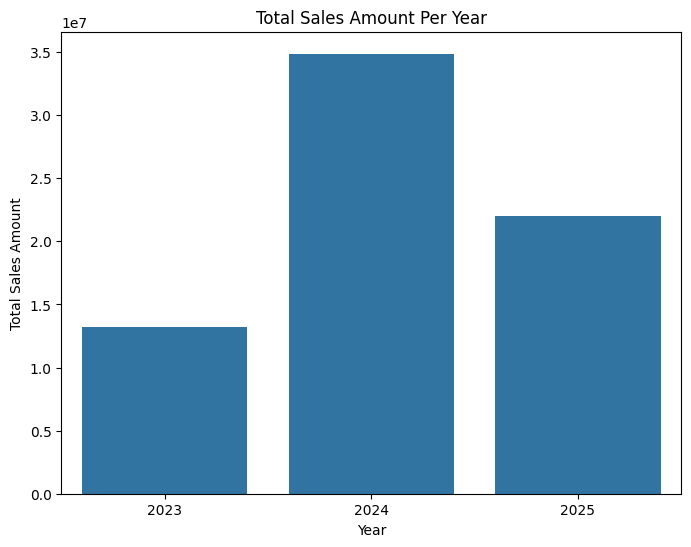

In [234]:
plt.figure(figsize=(8,6))
sales_by_year = data.groupby('Year')['TotalAmount'].sum().reset_index()
sns.barplot(data=sales_by_year, x="Year", y="TotalAmount")
plt.title("Total Sales Amount Per Year")
plt.xlabel("Year")
plt.ylabel("Total Sales Amount")
plt.show()

/tmp/ipython-input-2157026561.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


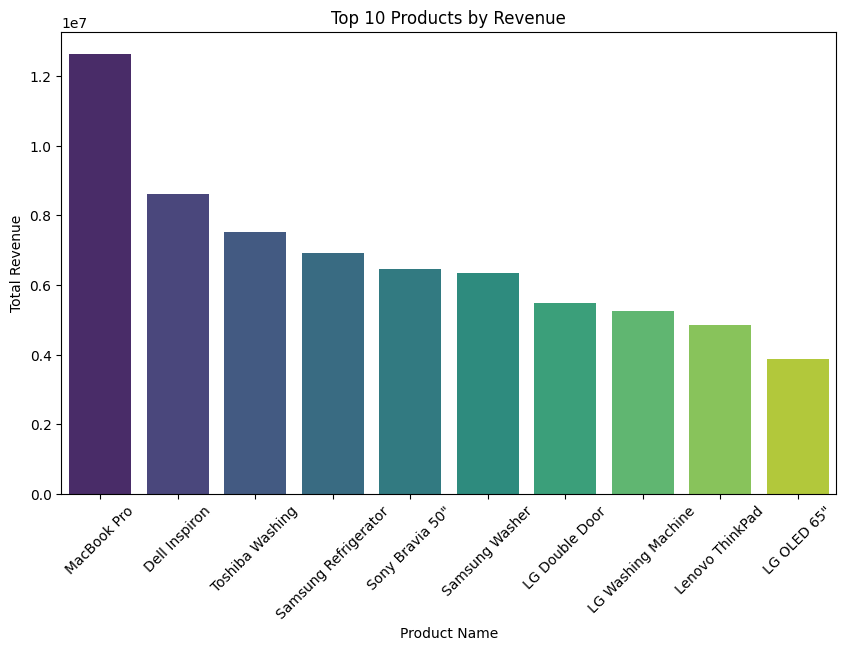

In [235]:
# Merge sales with product table to get ProductName
sales_products = sales.merge(product[["ProductID", "ProductName"]], on="ProductID", how="left")

# Top 10 products by revenue
top_products = sales_products.groupby("ProductName")["TotalAmount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


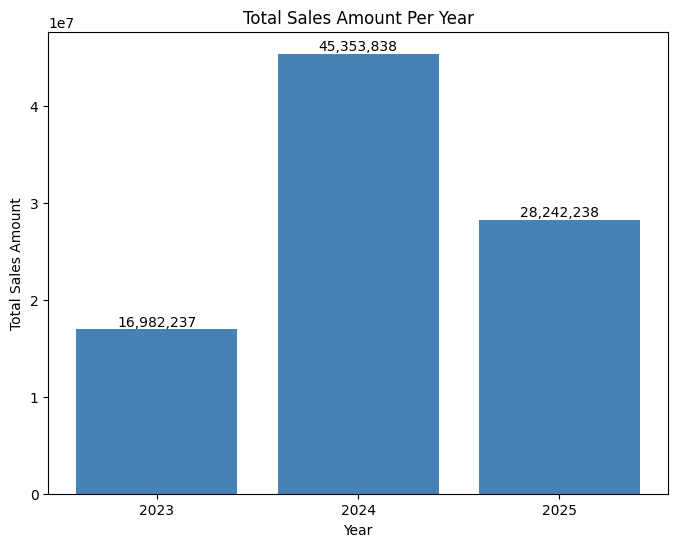

In [236]:
# Aggregate total sales per year
yearly_sales = sales.groupby(sales["InvoiceDate"].dt.year)["TotalAmount"].sum()

plt.figure(figsize=(8,6))
bars = plt.bar(yearly_sales.index.astype(str), yearly_sales.values, color="steelblue")

plt.title("Total Sales Amount Per Year")
plt.xlabel("Year")
plt.ylabel("Total Sales Amount")

# Add total sales numbers above each bar
for bar, value in zip(bars, yearly_sales.values):
    plt.text(
        bar.get_x() + bar.get_width()/2,  # x position (middle of bar)
        bar.get_height(),                 # y position (top of bar)
        f"{value:,.0f}",                  # format with commas
        ha="center", va="bottom"
    )

plt.show()

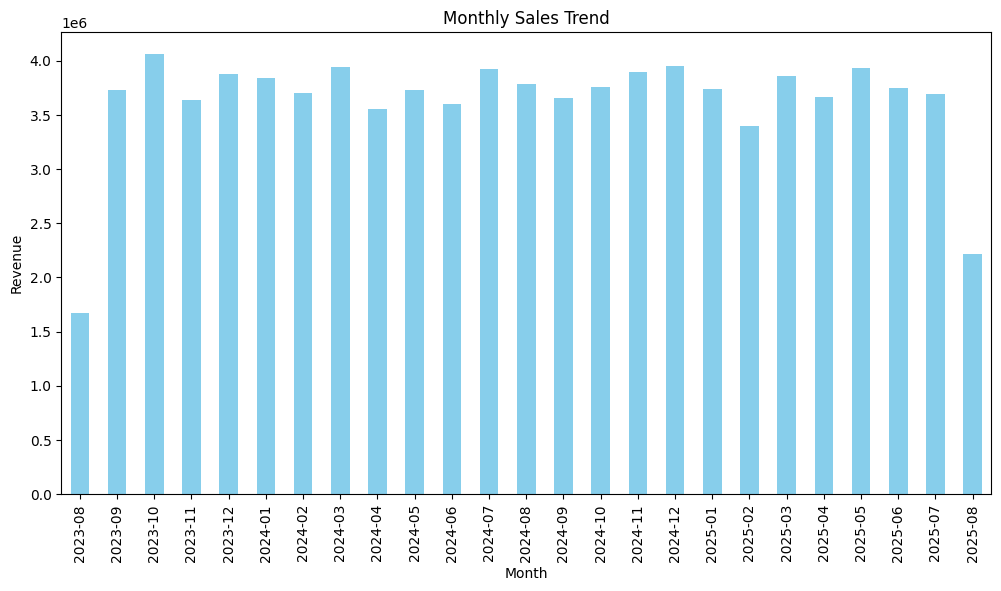

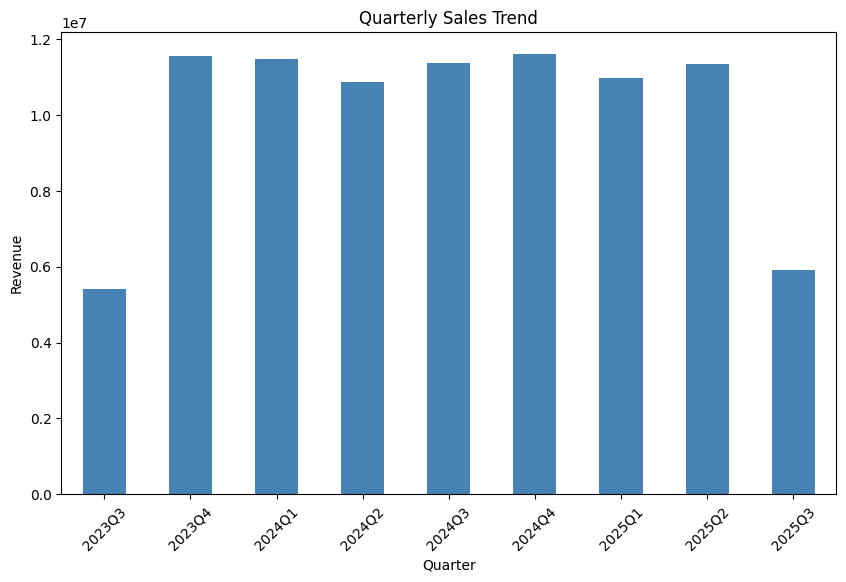

In [237]:
# Ensure InvoiceDate is datetime
sales["InvoiceDate"] = pd.to_datetime(sales["InvoiceDate"])



# Monthly sales trend
monthly_sales = sales.groupby(sales["InvoiceDate"].dt.to_period("M"))["TotalAmount"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind="bar", color="skyblue")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.show()

# Quarterly sales trend
quarterly_sales = sales.groupby(sales["InvoiceDate"].dt.to_period("Q"))["TotalAmount"].sum()

plt.figure(figsize=(10,6))
quarterly_sales.plot(kind="bar", color="steelblue")
plt.title("Quarterly Sales Trend")
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3504739336.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_sales.index, y=cat_sales.values, palette="Set2")


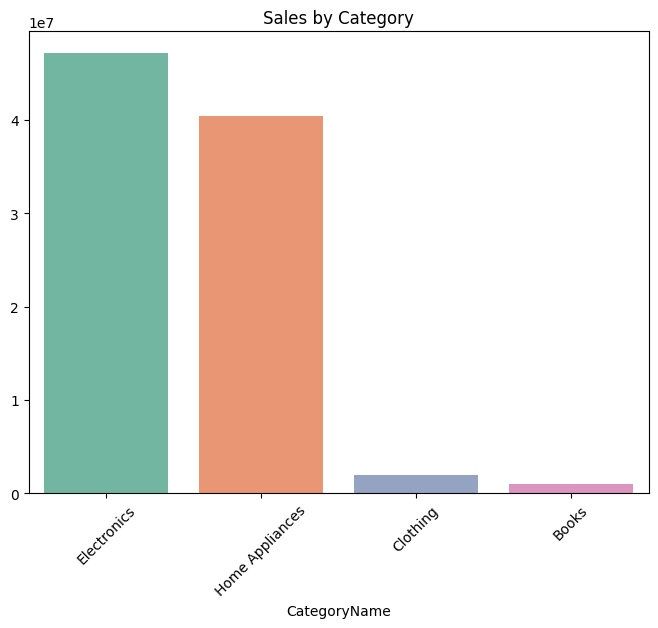

/tmp/ipython-input-3504739336.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_sales.index, y=subcat_sales.values, palette="Set3")


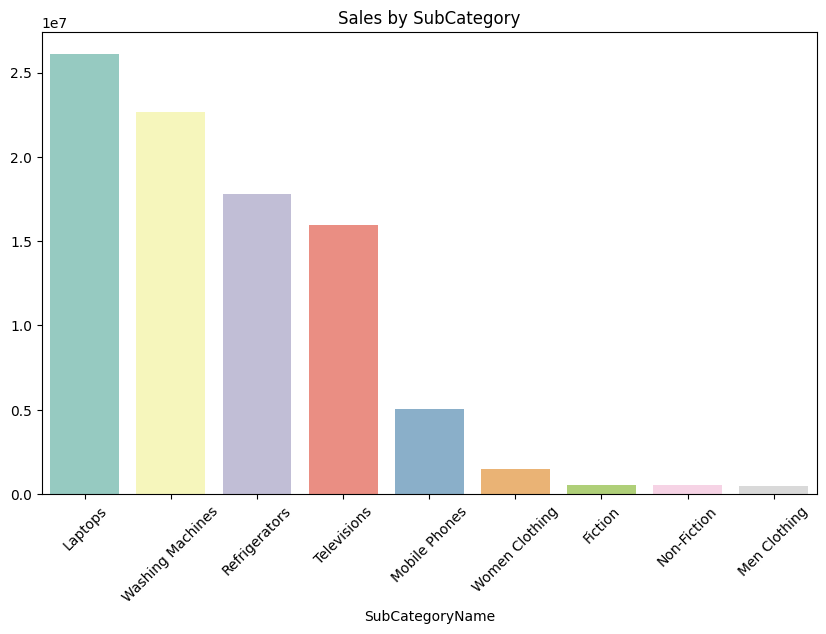

In [238]:
# Merge sales with category and subcategory tables
sales_categorized = sales.merge(product[["ProductID", "SubCategoryID"]], on="ProductID", how="left")\
                         .merge(subcategory[["SubCategoryID", "SubCategoryName", "CategoryID"]], on="SubCategoryID", how="left")\
                         .merge(category[["CategoryID", "CategoryName"]], on="CategoryID", how="left")


# Category sales
cat_sales = sales_categorized.groupby("CategoryName")["TotalAmount"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=cat_sales.index, y=cat_sales.values, palette="Set2")
plt.title("Sales by Category")
plt.xticks(rotation=45)
plt.show()

# SubCategory sales
subcat_sales = sales_categorized.groupby("SubCategoryName")["TotalAmount"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=subcat_sales.index, y=subcat_sales.values, palette="Set3")
plt.title("Sales by SubCategory")
plt.xticks(rotation=45)
plt.show()

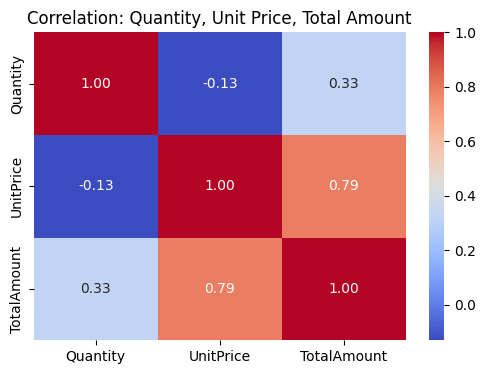

In [244]:
plt.figure(figsize=(6,4))
corr = data[["Quantity", "UnitPrice", "TotalAmount"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Quantity, Unit Price, Total Amount")
plt.show()


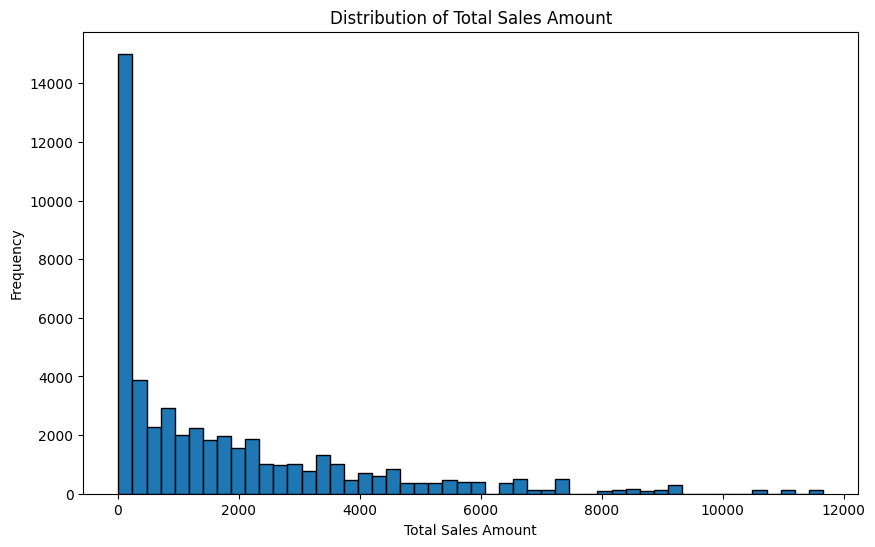

In [240]:
plt.figure(figsize=(10, 6))
plt.hist(x=sales["TotalAmount"], bins=50, edgecolor='black')
plt.title("Distribution of Total Sales Amount")
plt.xlabel("Total Sales Amount")
plt.ylabel("Frequency")
plt.show()